## Project: Investigate  WeRateDogs Twitter Archive Dataset

## INTRODUCTON

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, commonly known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs and includes a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc.


### CONTEXT

My goal is to investigate and wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

Three datasets were given to perfom this wrangling. These datasets are
- twitter_archive_enhanced.csv
- image_predictions.tsv
- twitter API

## QUESTIONS

- What is the most popular tweet source?
- What is the most popular dog breed and the least popular dog breed?
- What correlation between retweets and favorite counts?
- What is most popular dog name?
- What breed has the highest rating?
- What is the average retweeted and least retweeted dog breed?
- What is the average liked dog breed?
- What is the top dog stages

## IMPORTING THE NECESSARY PYTHON LIBRARIES

In [1]:
import requests
import os
import pandas as pd
!pip install beautifulsoup4
from bs4 import BeautifulSoup
!pip install tweepy
!pip install configparser
import tweepy
import json
import matplotlib as mlt
import numpy as np
import datetime
from timeit import default_timer as timer

##  Data Gathering

## Extracting twitter_archive_enchanced.csv
This twitter archive was downloaded by WeRateDogs and sent to Udacity for analysis purposes.

In [2]:
twitter_achived = pd.read_csv(r"C:\Users\SHIJI\ALX-T\Module _2_project\twitter-archive-enhanced.csv")

## Extracting image-predictions.tsv

In [3]:
folder_name = 'prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)


In [4]:
# Save HTML to file

with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [5]:
image_prediction =pd.read_csv('image-predictions.tsv', sep = '\t')

## Extracting data (retweets, likes) from twitter API

In [6]:
%run ./dami_keys.ipynb

In [7]:
# Authenticate to Twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)   
auth.set_access_token(access_key, access_secret) 

api = tweepy.API(auth, wait_on_rate_limit=True)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [8]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_achived.tweet_id.values

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
tweets_list = []
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            hashtag = tweet._json['entities']['hashtags']
            if hashtag:
                tweets_list.append({
                "tweet_id" : int(tweet_id),
                "retweets" : tweet._json['retweet_count'],
                "favorite_count" : tweet._json['favorite_count'],
                "time_stamp" : tweet._json['created_at']
                })
            else:
                tweets_list.append({
                "tweet_id" : int(tweet_id),
                "retweets" : tweet._json['retweet_count'],
                "favorite_count" : tweet._json['favorite_count'],
                "time_stamp" : tweet._json['created_at']
                })             
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 32


Success
196: 855138241867124737
Success
197: 854732716440526848
Success
198: 854482394044301312
Success
199: 854365224396361728
Success
200: 854120357044912130
Success
201: 854010172552949760
Success
202: 853760880890318849
Success
203: 853639147608842240
Success
204: 853299958564483072
Success
205: 852936405516943360
Success
206: 852912242202992640
Success
207: 852672615818899456
Success
208: 852553447878664193
Success
209: 852311364735569921
Success
210: 852226086759018497
Success
211: 852189679701164033
Success
212: 851953902622658560
Fail
213: 851861385021730816
Fail
214: 851591660324737024
Success
215: 851464819735769094
Success
216: 851224888060895234
Success
217: 850753642995093505
Success
218: 850380195714523136
Success
219: 850333567704068097
Success
220: 850145622816686080
Success
221: 850019790995546112
Success
222: 849776966551130114
Success
223: 849668094696017920
Success
224: 849412302885593088
Success
225: 849336543269576704
Success
226: 849051919805034497
Success
227: 8

Success
453: 818614493328580609
Success
454: 818588835076603904
Success
455: 818536468981415936
Success
456: 818307523543449600
Success
457: 818259473185828864
Success
458: 818145370475810820
Success
459: 817908911860748288
Success
460: 817827839487737858
Success
461: 817777686764523521
Success
462: 817536400337801217
Success
463: 817502432452313088
Success
464: 817423860136083457
Success
465: 817415592588222464
Success
466: 817181837579653120
Success
467: 817171292965273600
Success
468: 817120970343411712
Success
469: 817056546584727552
Success
470: 816829038950027264
Success
471: 816816676327063552
Success
472: 816697700272001025
Success
473: 816450570814898180
Success
474: 816336735214911488
Success
475: 816091915477250048
Success
476: 816062466425819140
Success
477: 816014286006976512
Success
478: 815990720817401858
Success
479: 815966073409433600
Success
480: 815745968457060357
Success
481: 815736392542261248
Success
482: 815639385530101762
Success
483: 815390420867969024
Success


Success
710: 785170936622350336
Success
711: 784826020293709826
Success
712: 784517518371221505
Success
713: 784431430411685888
Success
714: 784183165795655680
Success
715: 784057939640352768
Success
716: 783839966405230592
Success
717: 783821107061198850
Success
718: 783695101801398276
Success
719: 783466772167098368
Success
720: 783391753726550016
Success
721: 783347506784731136
Success
722: 783334639985389568
Success
723: 783085703974514689
Success
724: 782969140009107456
Success
725: 782747134529531904
Success
726: 782722598790725632
Success
727: 782598640137187329
Success
728: 782305867769217024
Success
729: 782021823840026624
Success
730: 781955203444699136
Success
731: 781661882474196992
Success
732: 781655249211752448
Success
733: 781524693396357120
Success
734: 781308096455073793
Success
735: 781251288990355457
Success
736: 781163403222056960
Success
737: 780931614150983680
Success
738: 780858289093574656
Success
739: 780800785462489090
Success
740: 780601303617732608
Success


Success
967: 750383411068534784
Success
968: 750381685133418496
Success
969: 750147208377409536
Success
970: 750132105863102464
Success
971: 750117059602808832
Success
972: 750101899009982464
Success
973: 750086836815486976
Success
974: 750071704093859840
Success
975: 750056684286914561
Success
976: 750041628174217216
Success
977: 750026558547456000
Success
978: 750011400160841729
Success
979: 749996283729883136
Success
980: 749981277374128128
Success
981: 749774190421639168
Success
982: 749417653287129088
Success
983: 749403093750648834
Success
984: 749395845976588288
Success
985: 749317047558017024
Success
986: 749075273010798592
Success
987: 749064354620928000
Success
988: 749036806121881602
Success
989: 748977405889503236
Success
990: 748932637671223296
Success
991: 748705597323898880
Success
992: 748699167502000129
Success
993: 748692773788876800
Success
994: 748575535303884801
Success
995: 748568946752774144
Success
996: 748346686624440324
Success
997: 748337862848962560
Success


Rate limit reached. Sleeping for: 252


Success
1096: 736392552031657984
Success
1097: 736365877722001409
Success
1098: 736225175608430592
Success
1099: 736010884653420544
Success
1100: 735991953473572864
Success
1101: 735648611367784448
Success
1102: 735635087207878657
Success
1103: 735274964362878976
Success
1104: 735256018284875776
Success
1105: 735137028879360001
Success
1106: 734912297295085568
Success
1107: 734787690684657664
Success
1108: 734776360183431168
Success
1109: 734559631394082816
Success
1110: 733828123016450049
Success
1111: 733822306246479872
Success
1112: 733482008106668032
Success
1113: 733460102733135873
Success
1114: 733109485275860992
Success
1115: 732732193018155009
Success
1116: 732726085725589504
Success
1117: 732585889486888962
Success
1118: 732375214819057664
Success
1119: 732005617171337216
Success
1120: 731285275100512256
Success
1121: 731156023742988288
Success
1122: 730924654643314689
Success
1123: 730573383004487680
Success
1124: 730427201120833536
Success
1125: 730211855403241472
Success
11

Success
1345: 704499785726889984
Success
1346: 704491224099647488
Success
1347: 704480331685040129
Success
1348: 704364645503647744
Success
1349: 704347321748819968
Success
1350: 704134088924532736
Success
1351: 704113298707505153
Success
1352: 704054845121142784
Success
1353: 703774238772166656
Success
1354: 703769065844768768
Success
1355: 703631701117943808
Success
1356: 703611486317502464
Success
1357: 703425003149250560
Success
1358: 703407252292673536
Success
1359: 703382836347330562
Success
1360: 703356393781329922
Success
1361: 703268521220972544
Success
1362: 703079050210877440
Success
1363: 703041949650034688
Success
1364: 702932127499816960
Success
1365: 702899151802126337
Success
1366: 702684942141153280
Success
1367: 702671118226825216
Success
1368: 702598099714314240
Success
1369: 702539513671897089
Success
1370: 702332542343577600
Success
1371: 702321140488925184
Success
1372: 702276748847800320
Success
1373: 702217446468493312
Success
1374: 701981390485725185
Success
13

Success
1594: 686386521809772549
Success
1595: 686377065986265092
Success
1596: 686358356425093120
Success
1597: 686286779679375361
Success
1598: 686050296934563840
Success
1599: 686035780142297088
Success
1600: 686034024800862208
Success
1601: 686007916130873345
Success
1602: 686003207160610816
Success
1603: 685973236358713344
Success
1604: 685943807276412928
Success
1605: 685906723014619143
Success
1606: 685681090388975616
Success
1607: 685667379192414208
Success
1608: 685663452032069632
Success
1609: 685641971164143616
Success
1610: 685547936038666240
Success
1611: 685532292383666176
Success
1612: 685325112850124800
Success
1613: 685321586178670592
Success
1614: 685315239903100929
Success
1615: 685307451701334016
Success
1616: 685268753634967552
Success
1617: 685198997565345792
Success
1618: 685169283572338688
Success
1619: 684969860808454144
Success
1620: 684959798585110529
Success
1621: 684940049151070208
Success
1622: 684926975086034944
Success
1623: 684914660081053696
Success
16

Success
1843: 675870721063669760
Success
1844: 675853064436391936
Success
1845: 675849018447167488
Success
1846: 675845657354215424
Success
1847: 675822767435051008
Success
1848: 675820929667219457
Success
1849: 675798442703122432
Success
1850: 675781562965868544
Success
1851: 675740360753160193
Success
1852: 675710890956750848
Success
1853: 675707330206547968
Success
1854: 675706639471788032
Success
1855: 675534494439489536
Success
1856: 675531475945709568
Success
1857: 675522403582218240
Success
1858: 675517828909424640
Success
1859: 675501075957489664
Success
1860: 675497103322386432
Success
1861: 675489971617296384
Success
1862: 675483430902214656
Success
1863: 675432746517426176
Success
1864: 675372240448454658
Success
1865: 675362609739206656
Success
1866: 675354435921575936
Success
1867: 675349384339542016
Success
1868: 675334060156301312
Success
1869: 675166823650848770
Success
1870: 675153376133427200
Success
1871: 675149409102012420
Success
1872: 675147105808306176
Success
18

Rate limit reached. Sleeping for: 221


Success
1997: 672591762242805761
Success
1998: 672591271085670400
Success
1999: 672538107540070400
Success
2000: 672523490734551040
Success
2001: 672488522314567680
Success
2002: 672482722825261057
Success
2003: 672481316919734272
Success
2004: 672475084225949696
Success
2005: 672466075045466113
Success
2006: 672272411274932228
Success
2007: 672267570918129665
Success
2008: 672264251789176834
Success
2009: 672256522047614977
Success
2010: 672254177670729728
Success
2011: 672248013293752320
Success
2012: 672245253877968896
Success
2013: 672239279297454080
Success
2014: 672231046314901505
Success
2015: 672222792075620352
Success
2016: 672205392827572224
Success
2017: 672169685991993344
Success
2018: 672160042234327040
Success
2019: 672139350159835138
Success
2020: 672125275208069120
Success
2021: 672095186491711488
Success
2022: 672082170312290304
Success
2023: 672068090318987265
Success
2024: 671896809300709376
Success
2025: 671891728106971137
Success
2026: 671882082306625538
Success
20

Success
2246: 667885044254572545
Success
2247: 667878741721415682
Success
2248: 667873844930215936
Success
2249: 667866724293877760
Success
2250: 667861340749471744
Success
2251: 667832474953625600
Success
2252: 667806454573760512
Success
2253: 667801013445750784
Success
2254: 667793409583771648
Success
2255: 667782464991965184
Success
2256: 667773195014021121
Success
2257: 667766675769573376
Success
2258: 667728196545200128
Success
2259: 667724302356258817
Success
2260: 667550904950915073
Success
2261: 667550882905632768
Success
2262: 667549055577362432
Success
2263: 667546741521195010
Success
2264: 667544320556335104
Success
2265: 667538891197542400
Success
2266: 667534815156183040
Success
2267: 667530908589760512
Success
2268: 667524857454854144
Success
2269: 667517642048163840
Success
2270: 667509364010450944
Success
2271: 667502640335572993
Success
2272: 667495797102141441
Success
2273: 667491009379606528
Success
2274: 667470559035432960
Success
2275: 667455448082227200
Success
22

In [9]:
print(end - start)
print(fails_dict)

2245.6636705
{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.'), 873697596434513921: NotFound('404 Not Found\n144 - No status found with that ID.'), 872668790621863937: NotFound('404 Not Found\n144 - No status found with that ID.'), 872261713294495745: NotFound('404 Not Found\n144 - No status found with that ID.'), 869988702071779329: NotFound('404 Not Found\n144 - No status found with that ID.'), 866816280283807744: NotFound('404 Not Found\n144 - No status found with that ID.'), 861769973181624320: NotFound('404 Not Found\n144 - No status found with that ID.'), 856602993587888130: NotFound('404 Not Found\n144 - No status found with that ID.'), 856330835276025856: NotFound('404 Not Found\n144 - No status found with that ID.'), 851953902622658560: NotFound('404 Not Found\n144 - No status found with that ID.'), 851861385021730816: NotFound('404 Not Found\n144 - No status found with that ID.'), 845459076796616705: NotFound('404 Not Found\n144 - No status f

In [10]:
# saving the extracted data into a dataframe and a csv file for futher analysis
favorite_tweets_list = pd.DataFrame(tweets_list)
favorite_tweets_list.to_csv('favorite_tweets_list', index = False, encoding = 'utf-8')

## Data Accessing
 There are two types of data accessing, which are
- Visual data accessing and,
- programmatic data accessing

Accessing of data is done to check for:
- Quality issues such as consistency, validity, accuracy,completeness and
- Tidiness issues.

### Visual Assesment

In [11]:
twitter_achived.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
favorite_tweets_list.head()

,tweet_id,retweets,favorite_count,time_stamp
0,892420643555336193,6968,33687,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,5272,29220,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,3464,21969,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,7190,36774,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,7712,35170,Sat Jul 29 16:00:24 +0000 2017


In [14]:
twitter_achived.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [15]:
image_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [16]:
favorite_tweets_list.tail()

,tweet_id,retweets,favorite_count,time_stamp
2321,666049248165822465,36,88,Mon Nov 16 00:24:50 +0000 2015
2322,666044226329800704,115,246,Mon Nov 16 00:04:52 +0000 2015
2323,666033412701032449,36,100,Sun Nov 15 23:21:54 +0000 2015
2324,666029285002620928,39,112,Sun Nov 15 23:05:30 +0000 2015
2325,666020888022790149,419,2282,Sun Nov 15 22:32:08 +0000 2015


### Programmatic Assesment

In [17]:
# to get further information on twitter_achived dataset
twitter_achived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
# to get further information on image_prediction dataset
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
# to get further information on image_prediction dataset
favorite_tweets_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2326 non-null   int64 
 1   retweets        2326 non-null   int64 
 2   favorite_count  2326 non-null   int64 
 3   time_stamp      2326 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [20]:
twitter_achived['name'].value_counts().head(20)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Name: name, dtype: int64

In [21]:
twitter_achived['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [22]:
twitter_achived['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [23]:
twitter_achived['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

The `value_counts` function showed that there are exceptionally high values in the **rating_denominator** and **rating_numerator** fields

In [24]:
#let's confirm if there are duplicate values
sum(twitter_achived.duplicated())

0

In [25]:
# to check if there are duplicate tweet_id
favorite_tweets_list.tweet_id.duplicated().sum()

0

In [26]:
twitter_achived.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [27]:
twitter_achived.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [28]:
twitter_achived.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [29]:
twitter_achived.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [30]:
twitter_achived.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [31]:
for texts in twitter_achived.text[:10]:
    print(texts)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

https://t.co/Zr4hWfAs1H https://t.

### Quailty
This means the data has content issues.`The info()` function revealed certain quality issues. 

#### `twitter_achived` table
- There are 78 replies (in_reply_to_status_id, in_reply_to_status_id)
- There are 181 retweets(retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
- The 'a', 'an', 'none' values in the name column
- The  rating_denominator and rating_numerator fields are incorrect
- `source` column values should be in a text form
- Remove the url from the `text` column

#### `image_prediction` table
- Lowercase given names in the `p1`, `p2`, `p3` column


#### `favorite_tweets_list` table
- Removing the timestamp column

#### `we_rate_dogs` table
- - The tweet_id datatype should be a string datatype

### Tidiness
This means the data has structural issues which are listed below:

- The **retweet_count** and **favorite_count** of the `favorite_tweets_list` table should be part of the `twitter_achived` table. This is done by merging all dataframe into a single dataframe.
- **doggo, floofer, pupper** and **puppo** should all be combined into a single column
- Merging `p1`, `p2`, `p3` into a single column called `breeds`


## Data Cleaning
This is the third stage in data analysis process. It involves cleaning the mentioned quality and tidiness issues.
- The first step in data cleaning is to duplicate each dataframe and merge all dataframes into a single dataframe.


In [32]:
# lets duplicate each dataframe
favorite_tweets_list_clean = favorite_tweets_list.copy()
twitter_achived_clean = twitter_achived.copy() 
image_prediction_clean = image_prediction.copy()

### Tidiness 1


#### Define
Merging all dataframes into a single dataframe called `we_rate_dogs`

#### Code

In [33]:
favorite_tweets_list_clean = pd.merge(favorite_tweets_list_clean, twitter_achived_clean, on=['tweet_id'], how='left')
we_rate_dogs = pd.merge(favorite_tweets_list_clean, image_prediction_clean, on=['tweet_id'], how='left')

#### Test

In [34]:
# to get further information on we_rate_dogs dataset
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2326 entries, 0 to 2325
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2326 non-null   int64  
 1   retweets                    2326 non-null   int64  
 2   favorite_count              2326 non-null   int64  
 3   time_stamp                  2326 non-null   object 
 4   in_reply_to_status_id       78 non-null     float64
 5   in_reply_to_user_id         78 non-null     float64
 6   timestamp                   2326 non-null   object 
 7   source                      2326 non-null   object 
 8   text                        2326 non-null   object 
 9   retweeted_status_id         160 non-null    float64
 10  retweeted_status_user_id    160 non-null    float64
 11  retweeted_status_timestamp  160 non-null    object 
 12  expanded_urls               2268 non-null   object 
 13  rating_numerator            2326 

In [35]:
we_rate_dogs_clean = we_rate_dogs.copy()

### Quality 1
#### Define
Removing un-wanted columns such as `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id`, `in_reply_to_user_id`, `expanded_urls` from we_rate_dogs dataframe.


#### Code

In [36]:
we_rate_dogs.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id','time_stamp', 'expanded_urls', 'jpg_url', 'img_num'], axis = 1, inplace = True)

#### Test

In [37]:
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2326 entries, 0 to 2325
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2326 non-null   int64  
 1   retweets            2326 non-null   int64  
 2   favorite_count      2326 non-null   int64  
 3   timestamp           2326 non-null   object 
 4   source              2326 non-null   object 
 5   text                2326 non-null   object 
 6   rating_numerator    2326 non-null   int64  
 7   rating_denominator  2326 non-null   int64  
 8   name                2326 non-null   object 
 9   doggo               2326 non-null   object 
 10  floofer             2326 non-null   object 
 11  pupper              2326 non-null   object 
 12  puppo               2326 non-null   object 
 13  p1                  2056 non-null   object 
 14  p1_conf             2056 non-null   float64
 15  p1_dog              2056 non-null   object 
 16  p2    

### Tidiness 2

#### Define
Combining the **doggo, floofer, pupper** and **puppo** columns into a single column called `dog_type`. 

#### Code

In [38]:
we_rate_dogs['stage'] = we_rate_dogs.doggo + we_rate_dogs.floofer + we_rate_dogs.pupper + we_rate_dogs.puppo 

In [39]:
we_rate_dogs['stage'].value_counts() 

NoneNoneNoneNone        1951
NoneNonepupperNone       243
doggoNoneNoneNone         80
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage, dtype: int64

In [40]:
# create function to check dog stages
def dog_type(dog):
    if dog['stage'].count('None') == 2:
        return 'Doggo,Pupper' 
    else:
        if dog['stage'].count('doggo') == 1:
            return 'Doggo'
        elif dog['stage'].count('floofer') == 1:
            return 'Floofer'
        elif dog['stage'].count('pupper') == 1:
            return 'Pupper'
        elif dog['stage'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'

we_rate_dogs['dog_stage'] = we_rate_dogs.apply(dog_type, axis=1)

#### Test

In [41]:
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2326 entries, 0 to 2325
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2326 non-null   int64  
 1   retweets            2326 non-null   int64  
 2   favorite_count      2326 non-null   int64  
 3   timestamp           2326 non-null   object 
 4   source              2326 non-null   object 
 5   text                2326 non-null   object 
 6   rating_numerator    2326 non-null   int64  
 7   rating_denominator  2326 non-null   int64  
 8   name                2326 non-null   object 
 9   doggo               2326 non-null   object 
 10  floofer             2326 non-null   object 
 11  pupper              2326 non-null   object 
 12  puppo               2326 non-null   object 
 13  p1                  2056 non-null   object 
 14  p1_conf             2056 non-null   float64
 15  p1_dog              2056 non-null   object 
 16  p2    

In [42]:
we_rate_dogs.drop(['stage', 'puppo','pupper', 'floofer', 'doggo'], axis = 1, inplace = True)

In [43]:
we_rate_dogs['dog_stage'].value_counts()

None            1951
Pupper           243
Doggo             80
Puppo             29
Doggo,Pupper      14
Floofer            9
Name: dog_stage, dtype: int64

### Quality 2

#### Define
Changing the datatypes of tweet_id, timestamp, source columns

#### Code

In [44]:
we_rate_dogs['tweet_id'] = we_rate_dogs['tweet_id'].astype(str)
we_rate_dogs['timestamp'] = we_rate_dogs['timestamp'].apply(pd.to_datetime, errors='coerce')
we_rate_dogs['source'] = we_rate_dogs['source'].astype('category')

#### Test

In [45]:
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2326 entries, 0 to 2325
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2326 non-null   object             
 1   retweets            2326 non-null   int64              
 2   favorite_count      2326 non-null   int64              
 3   timestamp           2326 non-null   datetime64[ns, UTC]
 4   source              2326 non-null   category           
 5   text                2326 non-null   object             
 6   rating_numerator    2326 non-null   int64              
 7   rating_denominator  2326 non-null   int64              
 8   name                2326 non-null   object             
 9   p1                  2056 non-null   object             
 10  p1_conf             2056 non-null   float64            
 11  p1_dog              2056 non-null   object             
 12  p2                  2056 non-null 

### Quality 3

#### Define
Changing the incorrect dog names in the **name** column

#### Code

In [46]:
we_rate_dogs.name = we_rate_dogs.name.apply(lambda x : 'None' if x[0].islower() else x)

In [47]:
# dont use this
#we_rate_dogs['name'][we_rate_dogs['name'].str.match('[a-z]+')] = 'None' 

#### Test

In [48]:
we_rate_dogs['name'].value_counts().head(20)

None       840
Cooper      11
Charlie     11
Oliver      11
Tucker      10
Lucy        10
Lola        10
Penny       10
Winston      9
Bo           9
Sadie        8
Buddy        7
Daisy        7
Bailey       7
Toby         7
Milo         6
Scout        6
Dave         6
Stanley      6
Rusty        6
Name: name, dtype: int64

### Quality 4

#### Define
replacing source links into a text

[Link](https://www.geeksforgeeks.org/python-program-to-extract-strings-between-html-tags/)

#### Code

In [49]:
we_rate_dogs['source'] = we_rate_dogs.source.str.extract(">(.*?)<", expand = True)

#### Test

In [50]:
we_rate_dogs.source.value_counts()

Twitter for iPhone     2192
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

### Quality 5

#### Define
Removing  the url from the values in the `text` column

[link](https://stackoverflow.com/questions/67312321/how-to-remove-urls-between-texts-in-pandas-dataframe-rows)

#### Code

In [51]:
we_rate_dogs["text"] = we_rate_dogs["text"].str.replace(r'\s*https?://\S+(\s+|$)', ' ', regex = True).str.strip()

In [52]:
we_rate_dogs['text'] = we_rate_dogs['text'].replace('&amp;', '&')

In [53]:
for texts in we_rate_dogs.text[:10]:
    print(texts)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below
When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10
This is Zoey. She doesn't want to be one of the scary sharks

### Quality 6

#### Define
Changing values in`p1`, `p2`, `p3` columns to lower case
#### Code

In [54]:
we_rate_dogs['p1'] = we_rate_dogs['p1'].str.lower()
we_rate_dogs['p2'] = we_rate_dogs['p2'].str.lower()
we_rate_dogs['p3'] = we_rate_dogs['p3'].str.lower()

In [55]:
we_rate_dogs['p3'].head()

0                         banana
1                       papillon
2                         kelpie
3                        spatula
4    german_short-haired_pointer
Name: p3, dtype: object

In [56]:
we_rate_dogs['p2']

0                    bagel
1                 pekinese
2                 malamute
3       labrador_retriever
4         english_springer
               ...        
2321            rottweiler
2322               redbone
2323              malinois
2324    miniature_pinscher
2325                collie
Name: p2, Length: 2326, dtype: object

In [57]:
we_rate_dogs['p1']

0                       orange
1                    chihuahua
2                    chihuahua
3                  paper_towel
4                       basset
                 ...          
2321        miniature_pinscher
2322       rhodesian_ridgeback
2323           german_shepherd
2324                   redbone
2325    welsh_springer_spaniel
Name: p1, Length: 2326, dtype: object

### Tidiness 3

#### Define
Breeds
#### Code

In [58]:
# create empty lists 
dog_breed = []
dog_confidence = []

# writing a function that searches for True algorithm and appending it to the dog_confidence list
def dog_breed_confidence(column):
    if column['p1_dog'] == True:
        dog_breed.append(column['p1'])
        dog_confidence.append(column['p1_conf'])
    elif column['p2_dog'] == True:
        dog_breed.append(column['p2'])
        dog_confidence.append(column['p2_conf'])
    elif column['p3_dog'] == True:
        dog_breed.append(column['p3'])
        dog_confidence.append(column['p3_conf'])
    else:
        dog_breed.append('none')
        dog_confidence.append(0)
        

we_rate_dogs.apply(dog_breed_confidence, axis=1)

# adding the list to we_rate_dogs dataframe
we_rate_dogs['breed'] = dog_breed
we_rate_dogs['confidence'] = dog_confidence

In [59]:
# lets drop the 'p1', 'p2','p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog columns'
we_rate_dogs.drop(['p1', 'p2','p3', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'], axis = 1, inplace = True)

In [113]:
# replacing '_' with ' ' in the breed column
we_rate_dogs['breed'] = we_rate_dogs['breed'].str.replace("_", " ")
we_rate_dogs['breed'].head()

0                  none
1             chihuahua
2             chihuahua
3    labrador retriever
4                basset
Name: breed, dtype: object

#### Test

In [61]:
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2326 entries, 0 to 2325
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2326 non-null   object             
 1   retweets            2326 non-null   int64              
 2   favorite_count      2326 non-null   int64              
 3   timestamp           2326 non-null   datetime64[ns, UTC]
 4   source              2326 non-null   object             
 5   text                2326 non-null   object             
 6   rating_numerator    2326 non-null   int64              
 7   rating_denominator  2326 non-null   int64              
 8   name                2326 non-null   object             
 9   dog_stage           2326 non-null   object             
 10  breed               2326 non-null   object             
 11  confidence          2326 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64

### Quality 7

#### Define
Changing the ratings values to the appropiate values
#### Code

In [62]:
pd.set_option('display.max_rows', 250)
Rating_n = we_rate_dogs[((we_rate_dogs['rating_numerator'] > 13) | (we_rate_dogs['rating_denominator'] != 10))]
Rating_n[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
9,890240255349198849,This is Cassie. She is a college pup. Studying...,14,10
21,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. Th...,14,10
34,885518971528720385,I have a new hero and his name is Howard. 14/10,14,10
40,884441805382717440,"I present to you, Pup in Hat. Pup in Hat is gr...",14,10
54,881633300179243008,@roushfenway These are good dogs but 17/10 is ...,17,10
55,881536004380872706,Here is a pupper approaching maximum borkdrive...,14,10
63,879674319642796034,@RealKentMurphy 14/10 confirmed,14,10
67,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,14,10
75,878057613040115712,This is Emmy. She was adopted today. Massive r...,14,10
77,877611172832227328,RT @rachel2195: @dog_rates the boyfriend and h...,14,10


In [63]:
we_rate_dogs.iloc[1660:1664]

,tweet_id,retweets,favorite_count,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,breed,confidence
1660,681523177663676416,5184,13129,2015-12-28 17:12:42+00:00,Twitter for iPhone,This is Carly. She's actually 2 dogs fused tog...,12,10,Carly,None,norfolk_terrier,0.205067
1661,681340665377193984,246,1516,2015-12-28 05:07:27+00:00,Twitter for iPhone,I've been told there's a slight possibility he...,5,10,None,None,none,0.000000
1662,681339448655802368,3691,8542,2015-12-28 05:02:37+00:00,Twitter for iPhone,This is Asher. He's not wearing a seatbelt or ...,9,10,Asher,None,labrador_retriever,0.094615
1663,681320187870711809,671,2403,2015-12-28 03:46:05+00:00,Twitter for iPhone,This is Glacier. He's a very happy pup. Loves ...,11,10,Glacier,None,samoyed,0.362596


After running the above code, 
- I noticed in some rows that dates were recorded as ratings which i am going to remove from the dataframe.
- I also noticed that some ratings were float varible. This means i am going to change `rating_numerator`,`rating_denominator` to float datatype

In [64]:
for b in ['rating_numerator','rating_denominator']:
    we_rate_dogs[b] = we_rate_dogs[b].astype(float)

In [65]:
#updating the wrong ratings with the accurate ones
we_rate_dogs.loc[1661,'rating_numerator'] = 9.5
we_rate_dogs.loc[1684,'rating_numerator'] = 11.26
we_rate_dogs.loc[742,'rating_numerator'] = 11.27
we_rate_dogs.loc[675,'rating_numerator'] = 9.75
we_rate_dogs.loc[324,'rating_numerator'] = 9.75
we_rate_dogs.loc[1040,'rating_numerator'] = 14
we_rate_dogs.loc[1137,'rating_numerator'] = 13
we_rate_dogs.loc[1174,'rating_numerator'] = 11
we_rate_dogs.loc[1634,'rating_numerator'] = 10
we_rate_dogs.loc[2306,'rating_numerator'] = 9

In [66]:
we_rate_dogs.loc[297,'rating_denominator'] = 10
we_rate_dogs.loc[1040,'rating_denominator'] = 10
we_rate_dogs.loc[1137,'rating_denominator'] = 10
we_rate_dogs.loc[1174,'rating_denominator'] = 10
we_rate_dogs.loc[1634,'rating_denominator'] = 10
we_rate_dogs.loc[2306,'rating_denominator'] = 10


In [67]:
# dropping the rows which dates were recorded as ratings
we_rate_dogs.drop([326], inplace = True)
we_rate_dogs.drop([497], inplace = True)

In [68]:
we_rate_dogs.iloc[324:327]

,tweet_id,retweets,favorite_count,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,breed,confidence
324,832215909146226688,5700,0,2017-02-16 13:11:49+00:00,Twitter for iPhone,"RT @dog_rates: This is Logan, the Chow who liv...",9.75,10.0,Logan,None,none,0.000000
325,832215726631055365,8558,0,2017-02-16 13:11:05+00:00,Twitter for iPhone,RT @dog_rates: This is Moreton. He's the Good ...,13.00,10.0,Moreton,None,afghan_hound,0.274637
327,832040443403784192,8793,0,2017-02-16 01:34:34+00:00,Twitter for iPhone,RT @dog_rates: This is Klein. These pics were ...,12.00,10.0,Klein,None,miniature_pinscher,0.796313


In [69]:
we_rate_dogs.iloc[495:500]

,tweet_id,retweets,favorite_count,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,breed,confidence
496,811386762094317568,5952,19774,2016-12-21 01:44:13+00:00,Twitter for iPhone,This is Craig. That's actually a normal sized ...,11.0,10.0,Craig,Pupper,pembroke,0.804177
498,810896069567610880,1637,8495,2016-12-19 17:14:23+00:00,Twitter for iPhone,This is Hunter. He just found out he needs bra...,11.0,10.0,Hunter,None,flat-coated_retriever,0.820804
499,810657578271330305,2458,10388,2016-12-19 01:26:42+00:00,Twitter for iPhone,This is Pavlov. His floatation device has fail...,11.0,10.0,Pavlov,None,malamute,0.753521
500,810284430598270976,10458,33177,2016-12-18 00:43:57+00:00,Twitter for iPhone,This is Phil. He's a father. A very good fathe...,13.0,10.0,Phil,None,malamute,0.620768
501,810254108431155201,3150,13921,2016-12-17 22:43:27+00:00,Twitter for iPhone,"This is Gus. He likes to be close to you, whic...",12.0,10.0,Gus,None,staffordshire_bullterrier,0.292556


In [70]:
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2325
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2324 non-null   object             
 1   retweets            2324 non-null   int64              
 2   favorite_count      2324 non-null   int64              
 3   timestamp           2324 non-null   datetime64[ns, UTC]
 4   source              2324 non-null   object             
 5   text                2324 non-null   object             
 6   rating_numerator    2324 non-null   float64            
 7   rating_denominator  2324 non-null   float64            
 8   name                2324 non-null   object             
 9   dog_stage           2324 non-null   object             
 10  breed               2324 non-null   object             
 11  confidence          2324 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64

In [108]:
# saving the cleaned data into a csv file
we_rate_dogs.to_csv('we_rate_dogs.csv', encoding = 'utf-8', index = False)

## EXPLORATORY DATA ANALYSIS

In [72]:
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

In [73]:
twitter_archive_master = pd.read_csv('we_rate_dogs.csv') 

In [74]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2324 non-null   int64  
 1   retweets            2324 non-null   int64  
 2   favorite_count      2324 non-null   int64  
 3   timestamp           2324 non-null   object 
 4   source              2324 non-null   object 
 5   text                2324 non-null   object 
 6   rating_numerator    2324 non-null   float64
 7   rating_denominator  2324 non-null   float64
 8   name                2324 non-null   object 
 9   dog_stage           2324 non-null   object 
 10  breed               2324 non-null   object 
 11  confidence          2324 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 218.0+ KB


In [75]:
twitter_archive_master['tweet_id'] = twitter_archive_master['tweet_id'].astype(str)
twitter_archive_master['timestamp'] = twitter_archive_master['timestamp'].apply(pd.to_datetime, errors='coerce')
twitter_archive_master['source'] = twitter_archive_master['source'].astype('category')

In [76]:
twitter_source = twitter_archive_master.source.value_counts()
twitter_source

Twitter for iPhone     2190
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

Text(0, 0.5, 'tweet_count')

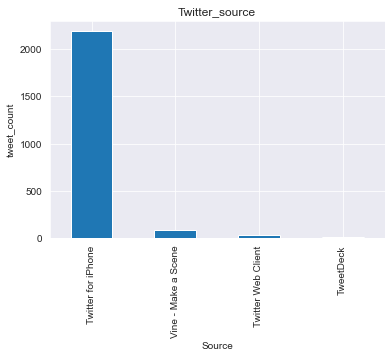

In [77]:
twitter_source.plot(kind = 'bar', title = 'Twitter_source')
plt.xlabel('Source', fontsize=10)
plt.ylabel('tweet_count', fontsize=10)

In [78]:
twitter_archive_master.breed.value_counts().head(10)

none                  589
golden_retriever      172
labrador_retriever    109
pembroke               95
chihuahua              93
pug                    65
toy_poodle             51
chow                   51
samoyed                45
pomeranian             42
Name: breed, dtype: int64

In [124]:
dog_breed = twitter_archive_master[twitter_archive_master.breed != 'none']

In [125]:
popular_breed = dog_breed['breed'].value_counts().head(10)
popular_breed

golden_retriever      172
labrador_retriever    109
pembroke               95
chihuahua              93
pug                    65
toy_poodle             51
chow                   51
samoyed                45
pomeranian             42
malamute               34
Name: breed, dtype: int64

Text(0, 0.5, 'Breed_count')

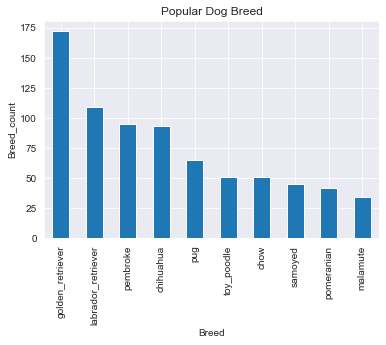

In [81]:
popular_breed.plot(kind = 'bar', title = 'Popular Dog Breed')
plt.xlabel('Breed', fontsize=10)
plt.ylabel('Breed_count', fontsize=10)

In [82]:
least_popular_breed = dog_breed.breed.value_counts().tail(10)
least_popular_breed

black-and-tan_coonhound    2
groenendael                2
entlebucher                1
standard_schnauzer         1
japanese_spaniel           1
clumber                    1
scotch_terrier             1
bouvier_des_flandres       1
silky_terrier              1
irish_wolfhound            1
Name: breed, dtype: int64

Text(0, 0.5, 'Breed_count')

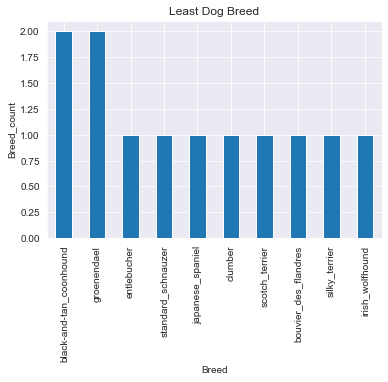

In [83]:
least_popular_breed.plot(kind = 'bar', title = 'Least Dog Breed')
plt.xlabel('Breed', fontsize=10)
plt.ylabel('Breed_count', fontsize=10)

In [84]:
ret_breed = dog_breed.groupby(['breed'])['retweets'].mean() .round()
ret_breed

breed
afghan_hound                      5712.0
airedale                          1115.0
american_staffordshire_terrier    1643.0
appenzeller                       1130.0
australian_terrier                2490.0
basenji                            707.0
basset                            2327.0
beagle                            1113.0
bedlington_terrier                6653.0
bernese_mountain_dog              1285.0
black-and-tan_coonhound           3300.0
blenheim_spaniel                  1883.0
bloodhound                        1987.0
bluetick                          1202.0
border_collie                     1776.0
border_terrier                    2731.0
borzoi                            1331.0
boston_bull                       1156.0
bouvier_des_flandres              3573.0
boxer                             2076.0
brabancon_griffon                  227.0
briard                            2355.0
brittany_spaniel                  1095.0
bull_mastiff                      1188.0
cairn     

In [85]:
most_retweet_breed = ret_breed.sort_values(ascending=False) .head()
most_retweet_breed

breed
standard_poodle       6961.0
bedlington_terrier    6653.0
afghan_hound          5712.0
french_bulldog        4384.0
samoyed               4238.0
Name: retweets, dtype: float64

Text(0, 0.5, 'Retweets')

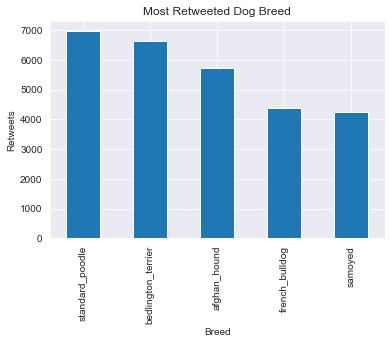

In [86]:
most_retweet_breed.plot(kind = 'bar', title = 'Most Retweeted Dog Breed')
plt.xlabel('Breed', fontsize=10)
plt.ylabel('Retweets', fontsize=10)

In [87]:
least_retweet_breed = ret_breed.sort_values(ascending=False) .tail()
least_retweet_breed

breed
entlebucher          553.0
tibetan_terrier      441.0
japanese_spaniel     354.0
brabancon_griffon    227.0
groenendael          220.0
Name: retweets, dtype: float64

Text(0, 0.5, 'Retweets')

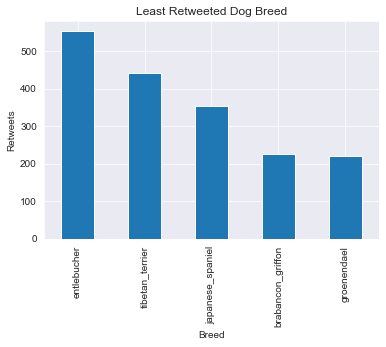

In [88]:
least_retweet_breed.plot(kind = 'bar', title = 'Least Retweeted Dog Breed')
plt.xlabel('Breed', fontsize=10)
plt.ylabel('Retweets', fontsize=10)

In [89]:
mean_fav_breed = dog_breed.groupby('breed')['favorite_count'].mean() .round()

In [90]:
fav_breed = mean_fav_breed.sort_values(ascending=False) .head()
fav_breed

breed
bedlington_terrier         21454.0
saluki                     20720.0
french_bulldog             17467.0
bouvier_des_flandres       15294.0
black-and-tan_coonhound    14616.0
Name: favorite_count, dtype: float64

Text(0, 0.5, 'Favorite_count')

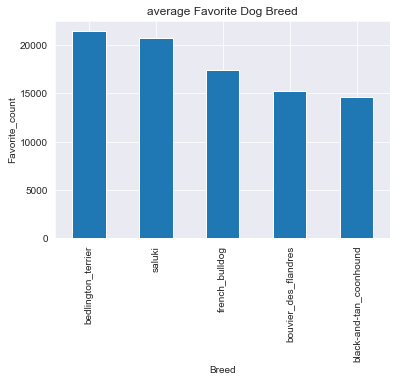

In [91]:
fav_breed.plot(kind = 'bar', title = 'average Favorite Dog Breed')
plt.xlabel('Breed', fontsize=10)
plt.ylabel('Favorite_count', fontsize=10)

In [92]:
twitter_archive_master.dog_stage.value_counts()

None            1949
Pupper           243
Doggo             80
Puppo             29
Doggo,Pupper      14
Floofer            9
Name: dog_stage, dtype: int64

In [93]:
stage= twitter_archive_master[twitter_archive_master.dog_stage != 'None']

In [94]:
type_ = stage.dog_stage.value_counts()

Text(0, 0.5, 'Dog stage_count')

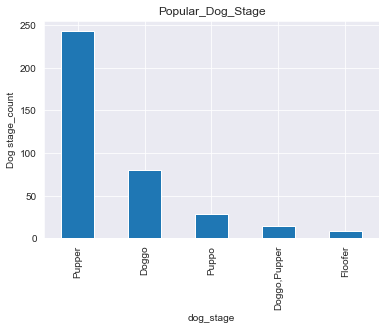

In [106]:
type_.plot(kind = 'bar', title = 'Popular_Dog_Stage')
plt.xlabel('dog_stage', fontsize=10)
plt.ylabel('Dog stage_count', fontsize=10)

In [96]:
dog_name = twitter_archive_master[twitter_archive_master.name != 'None']

In [97]:
twitter_archive_master.name.value_counts()

None          839
Cooper         11
Charlie        11
Oliver         11
Tucker         10
             ... 
Beya            1
Kayla           1
Edmund          1
Aqua            1
Christoper      1
Name: name, Length: 929, dtype: int64

In [98]:
Dog_ = dog_name.name.value_counts() .head(10)
Dog_

Charlie    11
Cooper     11
Oliver     11
Lola       10
Tucker     10
Lucy       10
Penny      10
Bo          9
Winston     9
Sadie       8
Name: name, dtype: int64

Text(0, 0.5, 'Name_count')

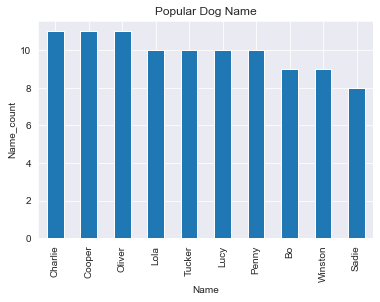

In [99]:
Dog_.plot(kind = 'bar', title = 'Popular Dog Name')
plt.xlabel('Name', fontsize=10)
plt.ylabel('Name_count', fontsize=10)

In [100]:
top_rating = dog_breed.groupby('breed')['rating_numerator'].mean() .sort_values(ascending=False) .head()

In [101]:
top_rating .round() .head()

breed
soft-coated_wheaten_terrier    21.0
west_highland_white_terrier    15.0
great_pyrenees                 15.0
chow                           14.0
labrador_retriever             14.0
Name: rating_numerator, dtype: float64

Text(0, 0.5, 'Average_Rating')

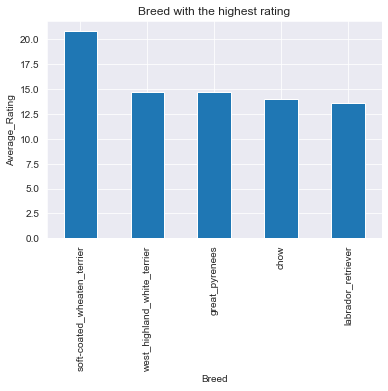

In [105]:
top_rating.plot(kind = 'bar', title = 'Breed with the highest rating')
plt.xlabel('Breed', fontsize=10)
plt.ylabel('Average_Rating', fontsize=10)

In [103]:
col1, col2 = "retweets", "favorite_count"
corr = twitter_archive_master[col1].corr(twitter_archive_master[col2])
corr

0.801537359129741

<AxesSubplot:xlabel='favorite_count', ylabel='retweets'>

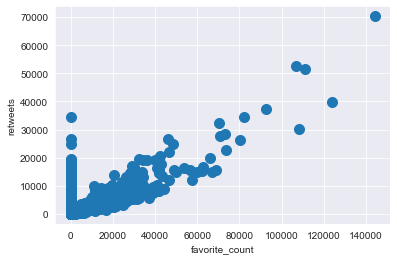

In [104]:
twitter_archive_master.plot.scatter(x = 'favorite_count', y = 'retweets', s = 100)